<a href="https://colab.research.google.com/github/ShantanuKadam3115/MachineLearningBasics/blob/ML_implementations/weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Running Experiment: Xavier Initialization ---
Layer 1 Variance: 0.340097
Layer 2 Variance: 0.168646
Layer 3 Variance: 0.088762
Layer 4 Variance: 0.043067
Layer 5 Variance: 0.024297
Layer 6 Variance: 0.013745
Layer 7 Variance: 0.007018
Layer 8 Variance: 0.003361
Layer 9 Variance: 0.001624
Layer 10 Variance: 0.000924


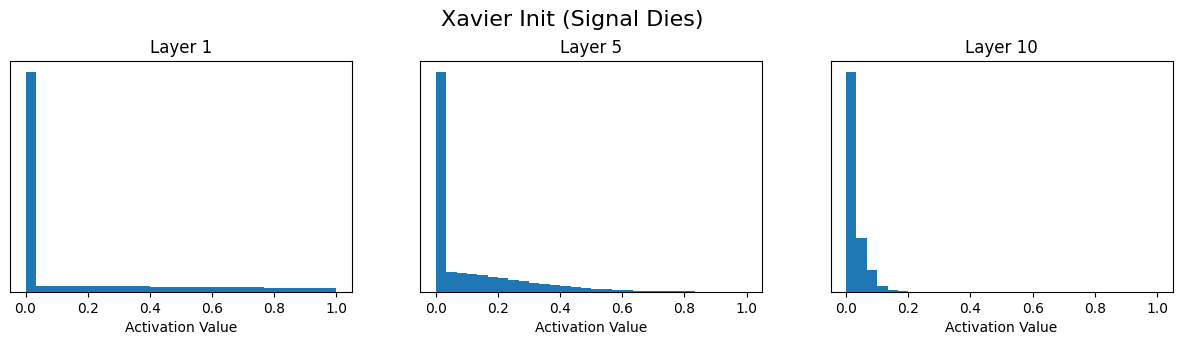



--- Running Experiment: He Initialization ---
Layer 1 Variance: 0.681516
Layer 2 Variance: 0.662226
Layer 3 Variance: 0.634225
Layer 4 Variance: 0.620188
Layer 5 Variance: 0.659414
Layer 6 Variance: 0.725988
Layer 7 Variance: 0.799097
Layer 8 Variance: 0.788089
Layer 9 Variance: 0.724944
Layer 10 Variance: 0.709924


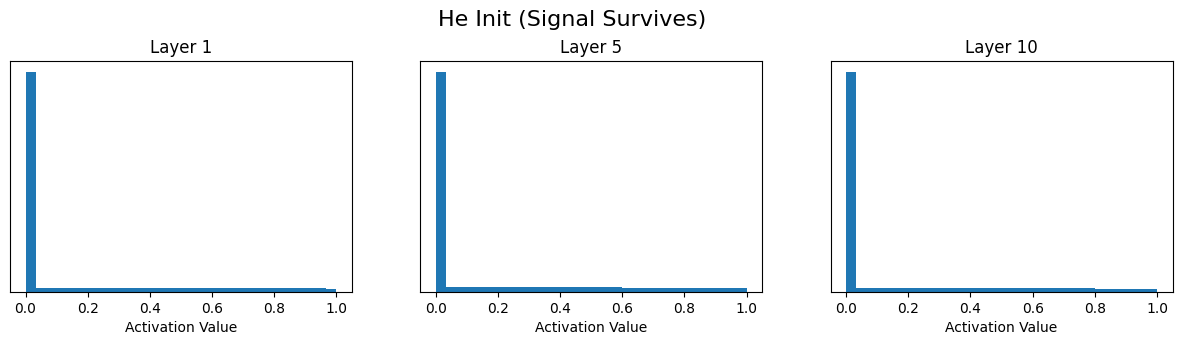

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
input_data_size = 1000   # 1000 input samples
hidden_layer_size = 500  # Each layer has 500 neurons
number_of_layers = 10

# Create random input data (Gaussian: Mean 0, Variance 1)
X = np.random.randn(input_data_size, hidden_layer_size)

# Define the ReLU function (sets negatives to 0)
def relu(x):
    return np.maximum(0, x)

# --- THE EXPERIMENT FUNCTION ---
def run_initialization_experiment(init_type):
    # This dictionary will store the output of each layer
    activations = {}

    # Start with the raw input
    current_input = X

    print(f"--- Running Experiment: {init_type} Initialization ---")

    # Loop through 10 layers
    for i in range(number_of_layers):

        # 1. CREATE WEIGHTS (The Core Math)
        # We start with random normal numbers (Variance = 1.0)
        W = np.random.randn(hidden_layer_size, hidden_layer_size)

        # Apply the scaling factor based on the method
        if init_type == 'Xavier':
            # Xavier Formula: Scale by sqrt(1 / n)
            # This is TOO SMALL for ReLU networks
            W = W * np.sqrt(1 / hidden_layer_size)

        elif init_type == 'He':
            # He Formula: Scale by sqrt(2 / n)
            # This compensates for ReLU killing half the signal
            W = W * np.sqrt(2 / hidden_layer_size)

        # 2. FORWARD PASS
        # Calculate Z = X . W
        z = np.dot(current_input, W)

        # Apply ReLU activation
        a = relu(z)

        # Save this layer's output to our dictionary
        activations[i] = a

        # Update input for the next layer
        current_input = a

        # Print variance to show the "dying" or "stable" signal numerically
        print(f"Layer {i+1} Variance: {np.var(a):.6f}")

    return activations

# --- VISUALIZATION FUNCTION ---
def plot_histograms(activations, title):
    plt.figure(figsize=(15, 3)) # Create a wide figure
    plot_layers = [0, 4, 9] # We will look at Layer 1, 5, and 10

    for i, layer_index in enumerate(plot_layers):
        plt.subplot(1, 3, i+1) # Create 3 subplots side-by-side

        # Get the data for this layer
        data = activations[layer_index].flatten()

        # Plot histogram
        plt.hist(data, bins=30, range=(0, 1)) # We look at range 0 to 1
        plt.title(f'Layer {layer_index + 1}')
        plt.xlabel('Activation Value')
        plt.yticks([]) # Hide y-axis numbers for cleanliness

    plt.suptitle(title, fontsize=16, y=1.05)
    plt.show()

# --- RUN SCENARIO 1: XAVIER (The Failure) ---
activations_xavier = run_initialization_experiment('Xavier')
plot_histograms(activations_xavier, "Xavier Init (Signal Dies)")

print("\n" + "="*50 + "\n")

# --- RUN SCENARIO 2: HE (The Success) ---
activations_he = run_initialization_experiment('He')
plot_histograms(activations_he, "He Init (Signal Survives)")